In [2]:
from mnist import MNIST
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

In [4]:

#(a)  Download the MNIST data from: http://yann.lecun.com/exdb/mnist/
mndata = MNIST('./data2')
itrain, ltrain = mndata.load_training()
itest, ltest =mndata.load_testing()

In [5]:
itrain = np.array(itrain)
itest = np.array(itest)

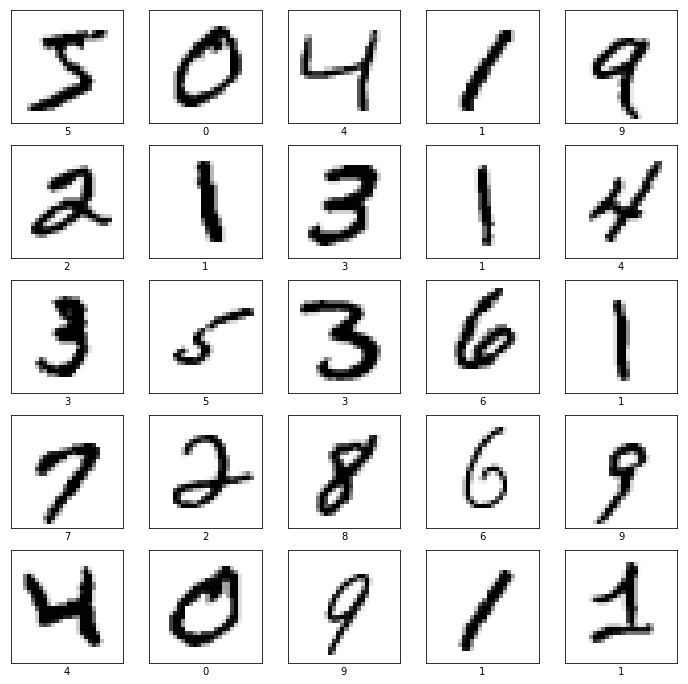

In [21]:
#(b) i. Plot the first 25 images in the training set. Do all images of 9 look alike?


fig, axes = plt.subplots(5, 5, figsize=(12, 12))
i=0
for e in range(5):
    for t in range(5):
        axes[e][t].imshow(itrain[i].reshape(28, 28), cmap='gray_r', interpolation='nearest')
        axes[e][t].set_xticks([])
        axes[e][t].set_yticks([])
        axes[e][t].set_xlabel(ltrain[i])
        i=i+1
plt.show()

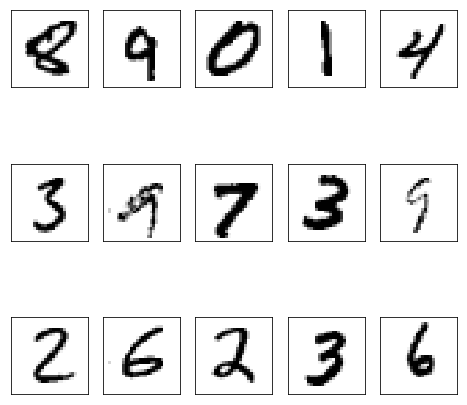

In [25]:
# ii. Plot 15 randomly selected images from the test set without looking at the
#     corresponding labels and try to guess them.  Were all of your guesses correct?

fig, axes = plt.subplots(3, 5, figsize=(8, 8))

for e in range(3):
    for t in range(5):
        rand=random.randrange(0, len(ltest))
        axes[e][t].imshow(itest[rand].reshape(28, 28), cmap='gray_r', interpolation='nearest')
        axes[e][t].set_xticks([])
        axes[e][t].set_yticks([])
      # axes[e][t].set_xlabel(ltest[rand])
        
plt.show()

    #print(ltest[rand])

In [ ]:
# iii.  Let us explore the data even more.  Find 2 different digits that look alike.
#       Find 3 samples of the same digit that do not look alike at all.

# 4 and 9 look alike  2173 4111 5639
# 2 2391 4876 3373 3912 7249 924


In [11]:
#train
nn = NearestNeighbors(n_neighbors=5,metric='euclidean').fit(itrain[:15000])


In [12]:

indices=nn.kneighbors(itest[0:10], return_distance=False)


In [13]:
print(indices)
#plot them

[[14563 14770 14505  9444  9724]
 [ 1609 12844 11364  2184  5816]
 [12578 11835  6380  1697 14992]
 [ 1877  2327 11791  4356  6357]
 [ 1732   914  7864 11956 11303]
 [ 3468  9815  9312 14154 14980]
 [11145    54 12070  2827 11378]
 [14815 11688  3186  4544  4158]
 [14233 14074  2885  9948 14189]
 [ 5044 13359  3970  9469  2453]]


In [14]:
indices.shape
fig, axes = plt.subplots(5, 10, figsize=(12, 12))


In [15]:
for e in range(5):
    for t in range(10):
        axes[e][t].imshow(itrain[indices[t][e]].reshape(28, 28), cmap='gray_r', interpolation='nearest')
        axes[e][t].set_xticks([])
        axes[e][t].set_yticks([])
 

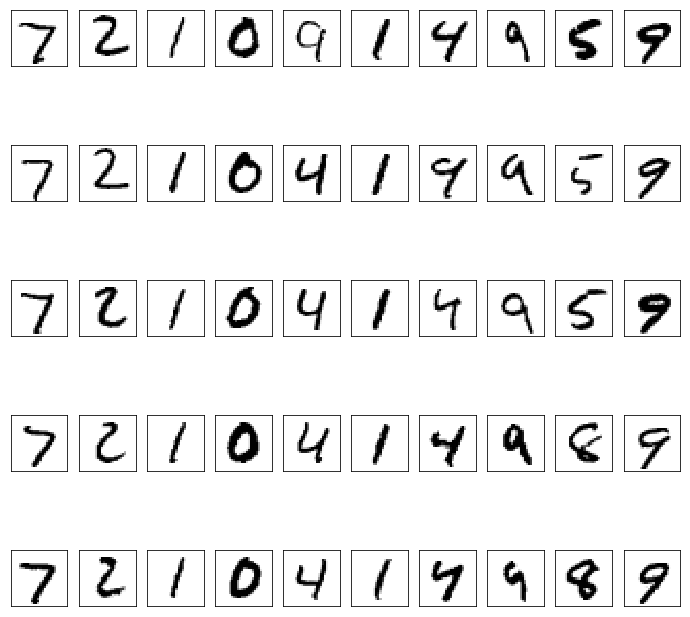

In [16]:
plt.show()

In [16]:
onebyk=[] 
errortrain=[]
errortest=[] 
for i in range(1,10,1):
    errortest.append(1-KNeighborsClassifier(n_neighbors=i).fit(itrain[:15000], np.asarray(ltrain[:15000])).score(itest[:5000],np.asarray(ltest[:5000])))
    errortrain.append(1-KNeighborsClassifier(n_neighbors=i).fit(itrain[:15000], np.asarray(ltrain[:15000])).score(itrain[:15000],np.asarray(ltrain[:15000])))
    onebyk.append(1/i)


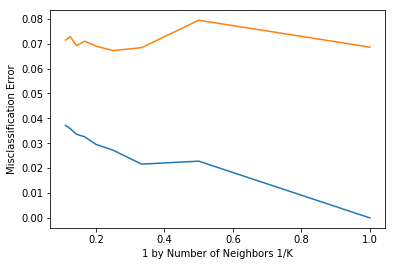

In [18]:
# plot misclassification error vs k
plt.plot( onebyk,errortrain)
plt.plot( onebyk,errortest)
plt.xlabel('1 by Number of Neighbors 1/K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
 N=[]
for i in range (1,1000,200):
        N.append(i)

In [11]:
onebyk

[1.0,
 0.047619047619047616,
 0.024390243902439025,
 0.01639344262295082,
 0.012345679012345678,
 0.009900990099009901]

In [13]:
besterror=[]
Nvalues=[]
for i in range(10000,1000,1000):
    besterror.append(1-KNeighborsClassifier(n_neighbors=i, metric='euclidean', algorithm='ball_tree').fit(itrain[:i], np.asarray(ltrain[:i])).score(itest[:5000],np.asarray(ltest[:5000])))
    Nvalues.append(i)

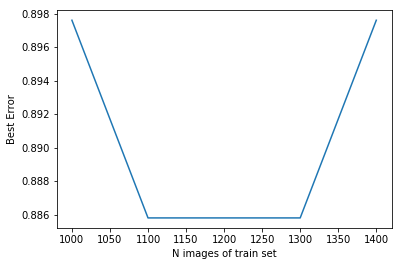

In [12]:
# plot misclassification error vs k
plt.plot( Nvalues,besterror)
plt.xlabel('N images of train set')
plt.ylabel('Best Error')
plt.show()

In [6]:
count = 0
knc = KNeighborsClassifier(n_neighbors=4).fit(itrain[:15000], np.asarray(ltrain[:15000]))
i=0
misclassified=[]
print(ltest[:10])
print(knc.predict(itest[:10]))

while (count < 10):
    if ltest[i]!=knc.predict(itest[i]):
        misclassified.append(itest[i])
        count = count + 1
    else: i=i+1

#knindices=nn.kneighbors(misclassified, return_distance=False)
#print(knindices)



array('B', [7, 2, 1, 0, 4, 1, 4, 9, 5, 9])
[7 2 1 0 4 1 4 9 5 9]
